# MNIST 데이터
**MNIST 데이터베이스(수정된 국립표준기술원 데이터베이스)** 는 다양한 이미지 처리 시스템을 교육하는 데 일반적으로 사용되는 필기 숫자의 대규모 데이터베이스입니다. 이 데이터베이스는 또한 기계 학습 분야의 훈련 및 테스트에 널리 사용됩니다. IT는 NIST의 원래 데이터셋에서 샘플을 "재혼합"하여 생성되었습니다. 작성자들은 NIST의 교육 데이터 세트가 미국 인구 조사국 직원들로부터 가져온 것인 반면, 테스트 데이터 세트는 미국 고등학생들로부터 가져온 것이기 때문에 기계 학습 실험에 적합하지 않다고 느꼈습니다.또한, NIST의 흑백 이미지는 28x28 픽셀 경계 상자에 맞도록 정규화되고 안티앨리어싱되어 그레이스케일 레벨이 도입되었습니다.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['MNIST']


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import TensorDataset
from torch.optim import Adam, SGD

from sklearn.decomposition import PCA
import pylab

# Basic Numeric Computation
import numpy as np
import pandas as pd

# Look at data
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
#from math import pi
#from collections import Counter
import seaborn as sns
from sklearn.decomposition import PCA
import pylab
import time
from sklearn.manifold import TSNE
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
device = torch.device("cpu")
epochs=10

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/train.csv'

In [ ]:
y_viz_train = train['label']
X_viz_train = train.drop('label', axis=1)
X_viz_test = test


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_viz_train = scaler.fit_transform(X_viz_train)
X_viz_test = scaler.fit_transform(X_viz_test)

# PCA- Principal Component Analysis
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process. So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_viz_train)
principalDf =pd.DataFrame(data = principalComponents, columns = ['principalcomponent1',  'principalcomponent2'])

label = pd.DataFrame(list(train['label']))
principalDf = pd.concat([principalDf,label],axis = 1,join='inner', ignore_index=True)
principalDf = principalDf.loc[:,~principalDf.columns.duplicated()]
principalDf.columns = ["principalcomponent1", "principalcomponent2", "label"] 

In [ ]:
principalDf.head()

,principalcomponent1,principalcomponent2,label
0,-5.140462,-5.226851,1
1,19.292332,6.032996,0
2,-7.644538,-1.705526,1
3,-0.474266,5.836427,4
4,26.559437,6.024841,0


<Figure size 936x720 with 0 Axes>

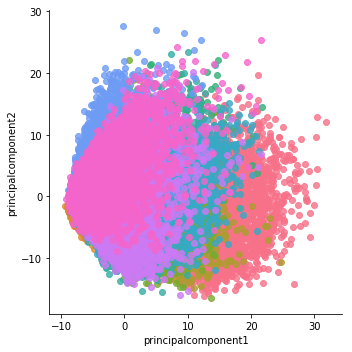

<Figure size 936x720 with 0 Axes>

In [ ]:
flatui = ["#9b59b6", "#3498db", "orange"]
sns.set_palette(flatui)
sns.lmplot( x="principalcomponent1", y="principalcomponent2", data=principalDf, fit_reg=False,
           hue='label', legend=False)

plt.figure(figsize=(13,10))

In [ ]:
N = 10000
df_subset = X_viz_train[:N,:].copy()

# t-SNE

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets.
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done in {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.853s...
[t-SNE] Computed neighbors for 10000 samples in 175.668s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.326759
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.538322
[t-SNE] KL divergence after 300 iterations: 2.496993
t-SNE done in 385.90423

In [ ]:
tsne3_subset = pd.DataFrame(columns=['tsne-3d-one', 'tsne-3d-two', 'tsne-3d-three'])

tsne3_subset['tsne-3d-one'] = tsne_results[:,0]
tsne3_subset['tsne-3d-two'] = tsne_results[:,1]
tsne3_subset['tsne-3d-three'] = tsne_results[:,2]

## t-SNE vs PCA
You’re probably wondering the difference between PCA and t-SNE. The first thing to note is that PCA was developed in 1933 while t-SNE was developed in 2008. A lot has changed in the world of data science since 1933 mainly in the realm of compute and size of data. Second, PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. Think of a manifold structure as any geometric shape like: cylinder, ball, curve, etc.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. You can see that due to the non-linearity of this toy dataset (manifold) and preserving large distances that PCA would incorrectly preserve the structure of the data.

In [ ]:
n_samples = 10000
X, color = make_swiss_roll(n_samples)

In [ ]:
time_start = time.time()
tsne2d = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne2d_results = tsne.fit_transform(df_subset)
print('t-SNE done in {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.865s...
[t-SNE] Computed neighbors for 10000 samples in 175.552s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.326759
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.397263
[t-SNE] KL divergence after 300 iterations: 2.489929
t-SNE done in 395.81935

In [ ]:
tsne2_subset = pd.DataFrame(columns=['tsne-2d-one', 'tsne-2d-two'])

tsne2_subset['tsne-2d-one'] = tsne2d_results[:,0]
tsne2_subset['tsne-2d-two'] = tsne2d_results[:,1]

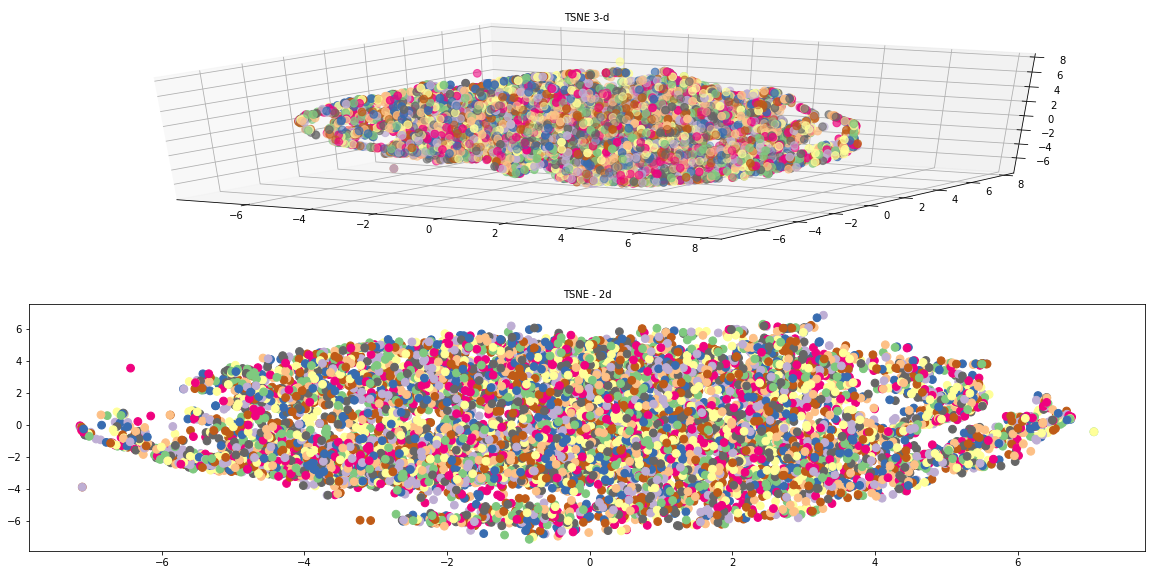

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('TSNE 3-d', fontsize=10)
ax.scatter(tsne_results[:,0],tsne_results[:,1],tsne_results[:,2],c = color,cmap="Accent",s=60)# we are picking up the x,y,z co-ordinate values from dataset
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('TSNE - 2d', fontsize=10)
ax.scatter(tsne2d_results[:,0],tsne2d_results[:,1],c = color,cmap="Accent",s=60)

# ISOMAP

Isomap stands for isometric mapping. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension. Isomap starts by creating a neighborhood network. After that, it uses graph distance to the approximate geodesic distance between all pairs of points. And then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset. In non-linear manifolds, the Euclidean metric for distance holds good if and only if neighborhood structure can be approximated as linear. If neighborhood contains holes, then Euclidean distances can be highly misleading. In contrast to this, if we measure the distance between two points by following the manifold, we will have a better approximation of how far or near two points are. Let's understand this with an extremely simple 2-D example. 

In [ ]:
##############
######
#ISOMAP
######
##############

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
manifold_iso_data = iso.transform(X)

Suppose our data lies on a circular manifold in a 2-D structure like in the image below.

> Why geodesic distances are better than the Euclidean distances in nonlinear manifolds?

 We will reduce the data to 1-D using the 'Euclidean' distances and approximate geodesic distances. Now, if we look at the 1-D mapping based on the Euclidean metric, we see that for points which are far apart(a & b) have been mapped poorly. Only the points which can be approximated to lie on a linear manifold(c & d) give satisfactory results. On the other hand, see the mapping with geodesic distances, it nicely approximates the close points as neighbors and far away points as distant.
The geodesic distances between two points in the image are approximated by graph distance between the two points. Thus, Euclidean distances should not be used for approximating the distance between two points in non-linear manifolds while geodesic distances can be used.

![ISOMAP GEO](https://i.imgur.com/9KqpHx3.png)

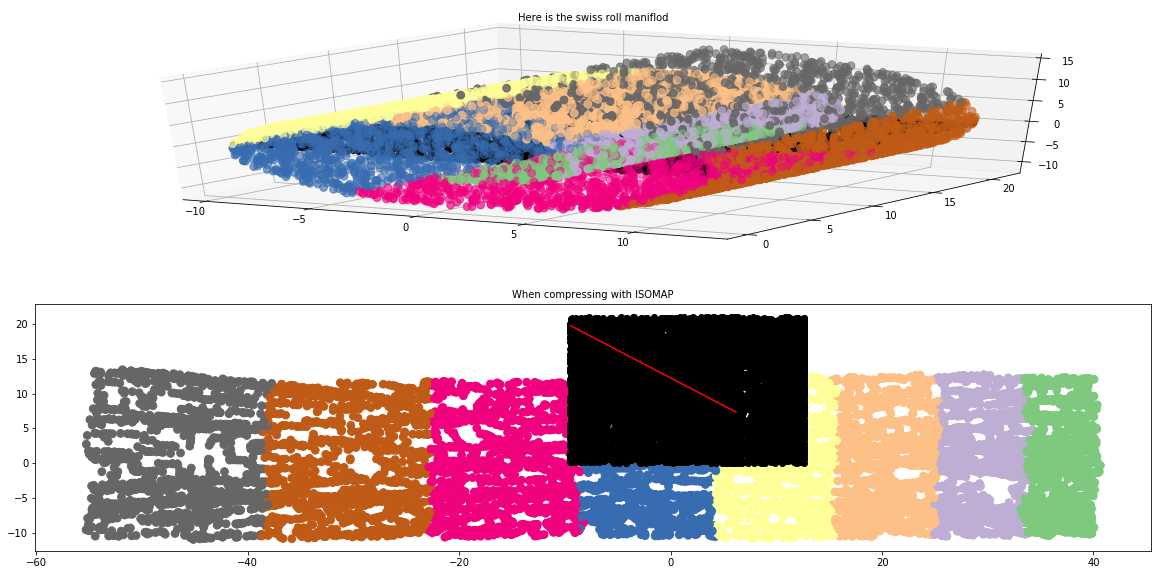

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:10000] 
y = X[:,1][2:10000] # Just as abovve, this time for column 1
ax.scatter(x,y,c = "black") #Now we randomly plot this in both 3D manifold (this may not be clearly visible as the  existing
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
#Now we plot 2D after ISOMAP...
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_iso_data[:,0],manifold_iso_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:10000]#Now we plot the same 'black' samples, after ISOMAP in 2D and observe the distance in 2D.
y = X[:,1][2:10000]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()



> Isomap uses the above principle to create a similarity matrix for eigenvalue decomposition.

Unlike other non-linear dimensionality reduction like LLE & LPP which only use local information, isomap uses the local information to create a global similarity matrix. The isomap algorithm uses euclidean metrics to prepare the neighborhood graph. Then, it approximates the geodesic distance between two points by measuring shortest path between these points using graph distance. Thus, it approximates both global as well as the local structure of the dataset in the low dimensional embedding.

In [ ]:
train['label'].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [ ]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# Convolutional Neural Network

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.
The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

In [ ]:
def Image_Data(raw: pd.DataFrame):
    y = raw['label'].values
    y.resize(y.shape[0],1)
    x = raw[[i for i in raw.columns if i != 'label']].values
    x = x.reshape([-1,1, 28, 28])
    y = y.astype(int).reshape(-1)
    x = x.astype(float)
    return x, y

## Convert to One Hot Embedding
def one_hot_embedding(labels, num_classes=10):
    y = torch.eye(num_classes) 
    return y[labels] 

x_train, y_train = Image_Data(train)


![CNN](https://i.imgur.com/eBQL6AL.jpg)

In [ ]:
# Normalization
mean = x_train.mean()
std = x_train.std()
x_train = (x_train-mean)/std


## Input Image:
We have an RGB image which has been separated by its three color planes — Red, Green, and Blue. 
There are a number of such color spaces in which images exist — Grayscale, RGB, HSV, CMYK, etc.
You can imagine how computationally intensive things would get once the images reach dimensions, say 8K (7680×4320). The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction. 

In [ ]:
# Numpy to Torch Tensor
x_train = torch.from_numpy(np.float32(x_train)).to(device)
y_train = torch.from_numpy(y_train.astype(np.long)).to(device)
y_train = one_hot_embedding(y_train)
#x_val = torch.from_numpy(np.float32(x_val))
#y_val = torch.from_numpy(y_val.astype(np.long))


# Convolution Layer
The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.There are two types of results to the operation — one in which the convolved feature is reduced in dimensionality as compared to the input, and the other in which the dimensionality is either increased or remains the same. This is done by applying Valid Padding in case of the former, or Same Padding in the case of the latter.

In [ ]:
# Convert into Torch Dataset
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=64)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

## Flatten Later
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

# Pooling Layer

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.
There are two types of Pooling:** Max Pooling and Average Pooling**. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

In [ ]:
# Train the network and print accuracy and loss overtime
def fit(train_dl, model, loss, optim, epochs=10):
    model = model.to(device)
    print('Epoch\tAccuracy\tLoss')
    accuracy_overtime = []
    loss_overtime = []
    for epoch in range(epochs):
        avg_loss = 0
        correct = 0
        total=0
        for x, y in train_dl: # Iterate over Data Loder
    
            # Forward pass
            yhat = model(x) 
            l = loss(y, yhat)
            
            #Metrics
            avg_loss+=l.item()
            
            # Backward pass
            optim.zero_grad()
            l.backward()
            optim.step()
            
            # Metrics
            _, original =  torch.max(y, 1)
            _, predicted = torch.max(yhat.data, 1)
            total += y.size(0)
            correct = correct + (original == predicted).sum().item()
            
        accuracy_overtime.append(correct/total)
        loss_overtime.append(avg_loss/len(train_dl))
        print(epoch,accuracy_overtime[-1], loss_overtime[-1], sep='\t')
    return accuracy_overtime, loss_overtime

In [ ]:
def plot_accuracy_loss(accuracy, loss):
    f = pyplot.figure(figsize=(15,5))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.title.set_text("Accuracy over epochs")
    ax2.title.set_text("Loss over epochs")
    ax1.plot(accuracy)
    ax2.plot(loss, 'r:')

In [ ]:
ff_model = nn.Sequential(
    Flatten(),
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.Softmax(1),
).to(device)


In [ ]:
ff_model.apply(init_weights)


Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
  (4): Softmax()
)

Epoch	Accuracy	Loss
0	0.9050952380952381	0.01399030865110392
1	0.9564523809523809	0.0067440965318587825
2	0.9694047619047619	0.004939908383260789
3	0.9756190476190476	0.00401716470487386
4	0.9796190476190476	0.003363142428248491
5	0.9816904761904762	0.0029757671518012827
6	0.983904761904762	0.0025907436557974736
7	0.9862380952380952	0.0022749163429541634
8	0.9873333333333333	0.002147132349215918
9	0.9879761904761905	0.001950671391510416


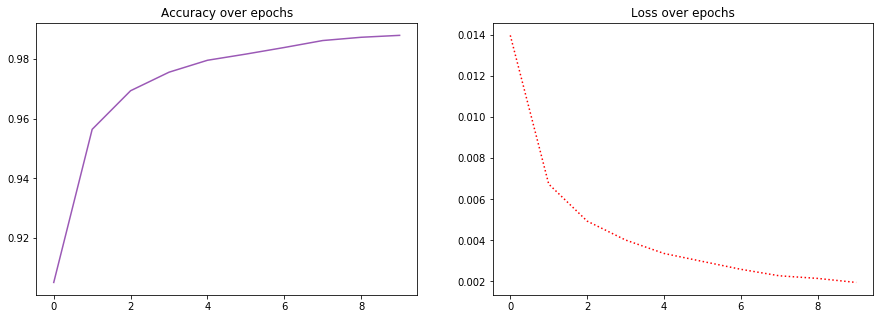

In [ ]:

optim = Adam(ff_model.parameters())
loss = nn.MSELoss()
output = fit(train_dl, ff_model, loss, optim, epochs)
plot_accuracy_loss(*output)

tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])


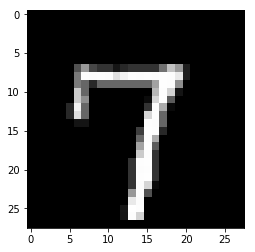

In [ ]:
index = 6
pyplot.imshow(x_train.cpu()[index].reshape((28, 28)), cmap="gray")
print(y_train[index])


In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

## Classification — Fully Connected Layer (FC Layer)
Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.
Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.

Epoch	Accuracy	Loss
0	0.8372142857142857	0.053881312506429316
1	0.9352857142857143	0.028203566483529553
2	0.9481190476190476	0.02425580277834853
3	0.9547142857142857	0.022060935137456047
4	0.9595238095238096	0.020575997263726126
5	0.9626904761904762	0.019465691530495835
6	0.9653571428571428	0.018584251603681476
7	0.9673809523809523	0.017856006771382767
8	0.9687619047619047	0.01723963547429946
9	0.9701190476190477	0.016708632507269332


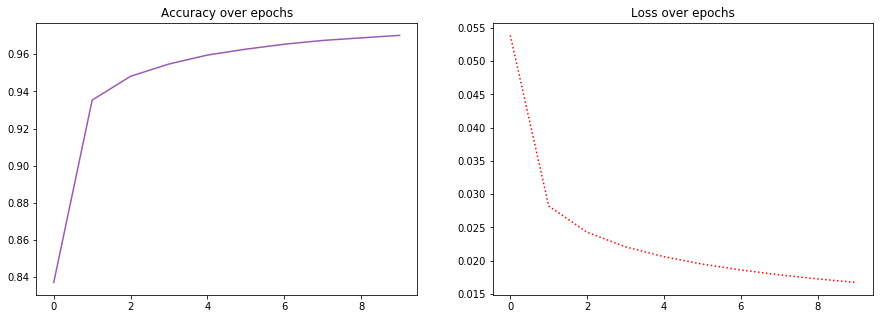

In [ ]:

num_classes = 10
model = ConvNet(num_classes).to(device)
model.apply(init_weights)
loss = nn.MSELoss()
optim = SGD(model.parameters(), lr=0.003, momentum=0.9)
plot_accuracy_loss(*fit(train_dl, model,loss,optim,epochs))

In [ ]:
x_test = test.values
x_test = x_test.reshape([-1, 28, 28]).astype(float)
x_test = (x_test-mean)/std
x_test = torch.from_numpy(np.float32(x_test))
x_test.shape


torch.Size([28000, 28, 28])

In [ ]:
def export_csv(model_name, predictions):
    df = pd.DataFrame(prediction.tolist(), columns=['Label'])
    df['ImageId'] = df.index + 1
    file_name = f'submission_{model_name}.csv'
    print('Saving ',file_name)
    df[['ImageId','Label']].to_csv(file_name, index = False)



In [ ]:
ff_test = ff_model(x_test.float())
prediction = torch.argmax(ff_test,1)
print('Prediction',prediction)
export_csv('ff_model',prediction)
torch.save(model.state_dict(), 'model_ff.ckpt')

Prediction tensor([2, 0, 9,  ..., 3, 9, 2])
Saving  submission_ff_model.csv
